Whitney Kenner
u0777962
HW5
7/2/23


In [2]:
# Imports and setup. 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [3]:
# Code to scale images...

digits = load_digits()
X = scale( digits.data )
y = digits.target

n_samples, n_features = X.shape
n_digits = len( np.unique(digits.target) )

print( "n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features) )

n_digits: 10, n_samples 1797, n_features 64


In [4]:
# This is what one digit (the "zero") looks like:

print( "===\nThe raw data" )
print( digits.images[0] )

print( "===\nThe scaled data" )
print( X[0] )

print( "===\nThe digit" )
print( digits.target[0] )

===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -

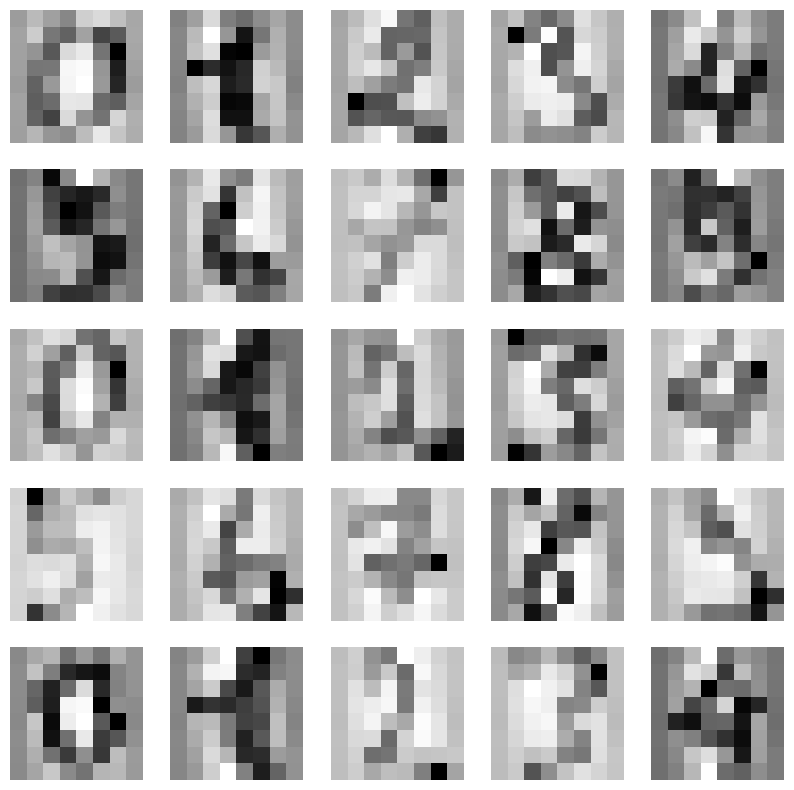

In [5]:
# Display the first 25 images...

plt.figure( figsize=(10, 10) )
 
for ii in np.arange( 25 ):
    plt.subplot( 5, 5, ii+1 )
    plt.imshow( np.reshape( X[ii,:], (8,8) ), cmap='Greys', interpolation='nearest' )
    plt.axis( 'off' )

plt.show()

Task 1.1: Classification with Support Vector Machines (SVM)

In [6]:
train_test_split( X, y, random_state=1, test_size=0.8 )

[array([[ 0.        , -0.33501649, -1.09493684, ..., -0.80760583,
         -0.5056698 , -0.19600752],
        [ 0.        , -0.33501649,  0.37766131, ...,  0.03999823,
          0.22793243, -0.19600752],
        [ 0.        , -0.33501649, -0.88456568, ..., -1.14664746,
         -0.5056698 , -0.19600752],
        ...,
        [ 0.        , -0.33501649,  0.37766131, ...,  1.05712311,
         -0.01660165, -0.19600752],
        [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         -0.26113572, -0.19600752],
        [ 0.        , -0.33501649,  0.58803248, ..., -1.14664746,
         -0.5056698 , -0.19600752]]),
 array([[ 0.        , -0.33501649,  0.16729015, ..., -0.63808502,
         -0.5056698 , -0.19600752],
        [ 0.        ,  8.48585718,  1.6398883 , ..., -1.14664746,
         -0.5056698 , -0.19600752],
        [ 0.        , -0.33501649, -0.25345218, ..., -0.12952258,
         -0.5056698 , -0.19600752],
        ...,
        [ 0.        , -0.33501649, -0.88456568, ..., -

In [8]:
#Use SVM with an rbf kernel and the cost parameter C=5 to build a classifier using the training dataset.
model = svm.SVC(kernel='rbf',gamma='auto', C=5)
model.fit(X,y)

print(model)

SVC(C=5)
